|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

In [2]:
# pip install --upgrade scikit-learn

# Q1: Import labraries

In [3]:
# write your code here ^_^
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [4]:
# write your code here ^_^
df = pd.read_csv("instagram_users.csv")
df

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64239,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,real
64240,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,real
64241,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,real
64242,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,real


In [5]:
df.head()

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.0,0.000,0.300494,0.126019,fake


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

# Q3: Split tha dataset into training and testing

In [7]:
# write your code here ^_^
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop("real_fake", axis=1)
y = df["real_fake"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

## Decision Tree

In [9]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [10]:
# write your code here ^_^
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
predictions = dtree.predict(X_test)

In [12]:
print(accuracy_score(y_test, predictions))

0.8552972916882847


In [13]:
confusionmatrix = confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[8129 1386]
 [1403 8356]]


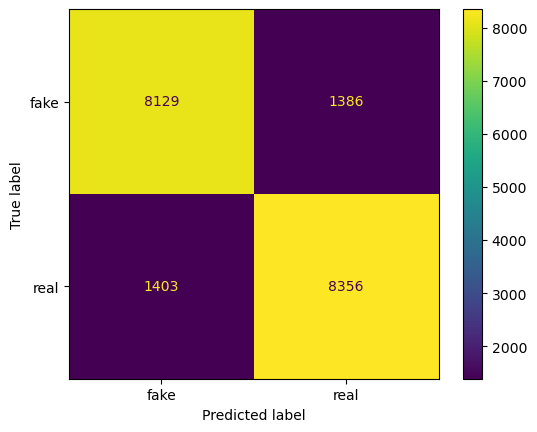

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=dtree.classes_).plot();



## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

## Random Forset

In [17]:
# write your code here ^_^
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
print(accuracy_score(y_test,predictions))

0.8552972916882847


In [21]:
rfc_pred = rfc.predict(X_test)
conf_matrix = confusion_matrix(y_test,rfc_pred)
print(conf_matrix)

[[7984 1531]
 [ 451 9308]]


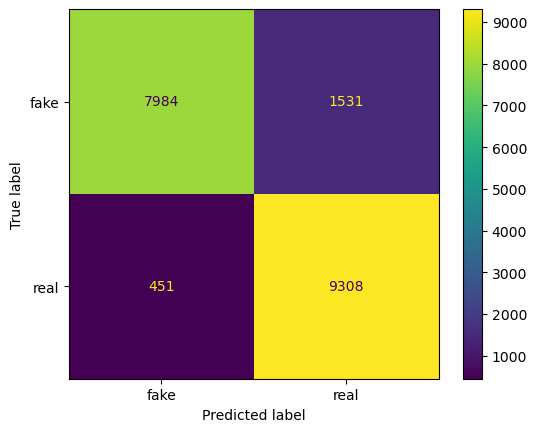

In [22]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfc.classes_).plot();